### На основе датасета titanic обучить дерево решений

##### Обучу дерево решений таким образом, чтобы оно предсказывало выжил человек или нет

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import seaborn as sns

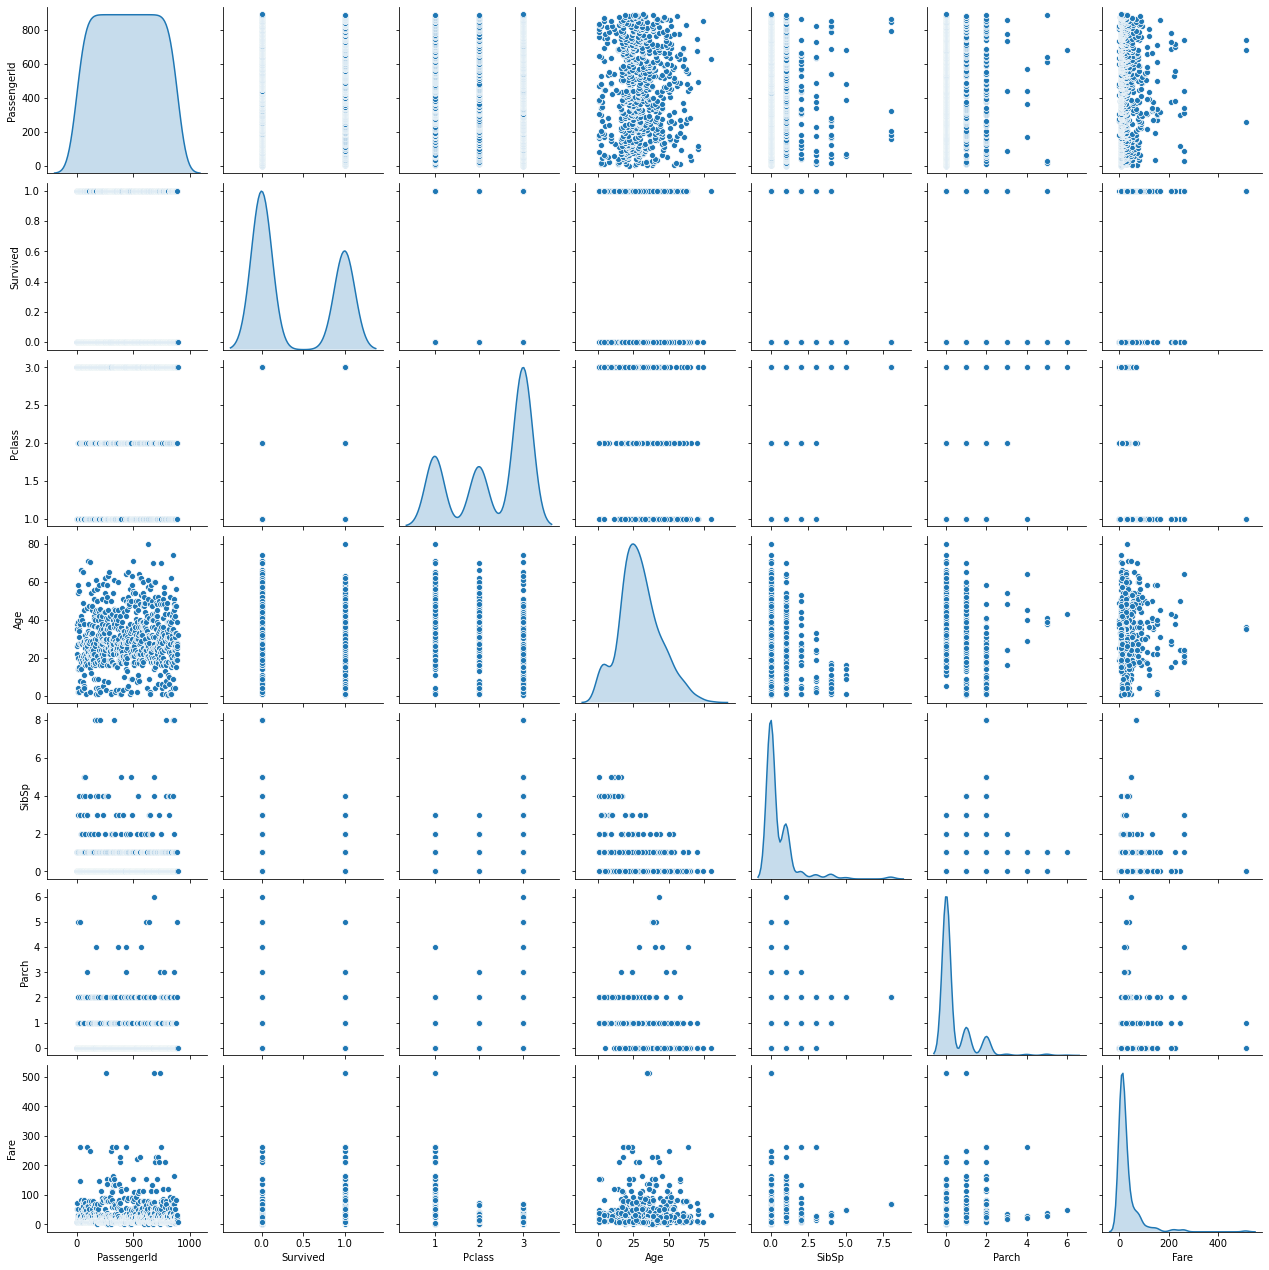

In [5]:
#визуализация данных
sns.pairplot(data, diag_kind="kde")

In [6]:
# указываем зависимую перменную отвечающую за выживание
y = data['Survived']

In [7]:
#смотрим как распределились выживающие в зависимости от пола
data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
# удаляем из входов зависимую перменную и незначимые  признаки
data.drop(['Survived',  'Name', 'PassengerId', 'Ticket', 'Cabin' , 'Embarked'], axis=1, inplace=True)

In [9]:
# переведем значения столбца sex в числа
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['Sex'] )
data['Sex']=le.transform(data['Sex'])

In [10]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int64
Age       714 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [12]:
# дозаполняем пропуски
data['Age'].fillna(data['Age'].median(), inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
classification_tree = DecisionTreeClassifier()

In [16]:
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
#предсказываем
y_predict = classification_tree.predict(X_test)

In [18]:
#коэффициент детерминации

score = classification_tree.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 77.58 %


### Подобрать оптимальную глубину дерева 

In [43]:
classification_tree = DecisionTreeClassifier(max_depth=5)
classification_tree.fit(X_train, y_train)

#коэффициент детерминации
score = classification_tree.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 84.30 %


In [20]:
classification_tree = DecisionTreeClassifier(max_depth=10)
classification_tree.fit(X_train, y_train)

#коэффициент детерминации
score = classification_tree.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 76.68 %


In [21]:
classification_tree = DecisionTreeClassifier(max_depth=4)
classification_tree.fit(X_train, y_train)

#коэффициент детерминации
score = classification_tree.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 83.86 %


In [22]:
classification_tree = DecisionTreeClassifier(max_depth=6)
classification_tree.fit(X_train, y_train)

#коэффициент детерминации
score = classification_tree.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 82.51 %


### Определить самые важные фичи

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

([<matplotlib.axis.YTick at 0x7fe17d960c40>,
 [Text(0, 0, 'Pclass'),
  Text(0, 0, 'Sex'),
  Text(0, 0, 'Age'),
  Text(0, 0, 'SibSp'),
  Text(0, 0, 'Parch'),
  Text(0, 0, 'Fare')])

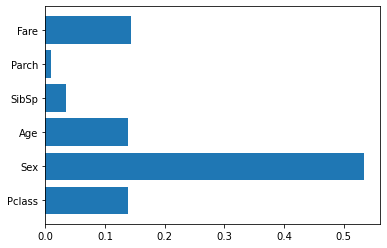

In [45]:
plt.barh(np.arange(len(classification_tree.feature_importances_)), classification_tree.feature_importances_)
plt.yticks(np.arange(len(data.columns)),data.columns)

### Визуализировать полученное дерево

In [46]:
import eli5
eli5.explain_weights_sklearn(classification_tree, feature_names=X_train.columns.values)

Weight,Feature
0.5342,Sex
0.1444,Fare
0.1389,Age
0.1381,Pclass
0.0348,SibSp
0.0098,Parch


In [47]:
from graphviz import Source
from sklearn import tree
#отобразить в jupiter
from IPython.display import SVG

graph = Source(tree.export_graphviz(classification_tree, out_file=None, feature_names=data.columns))

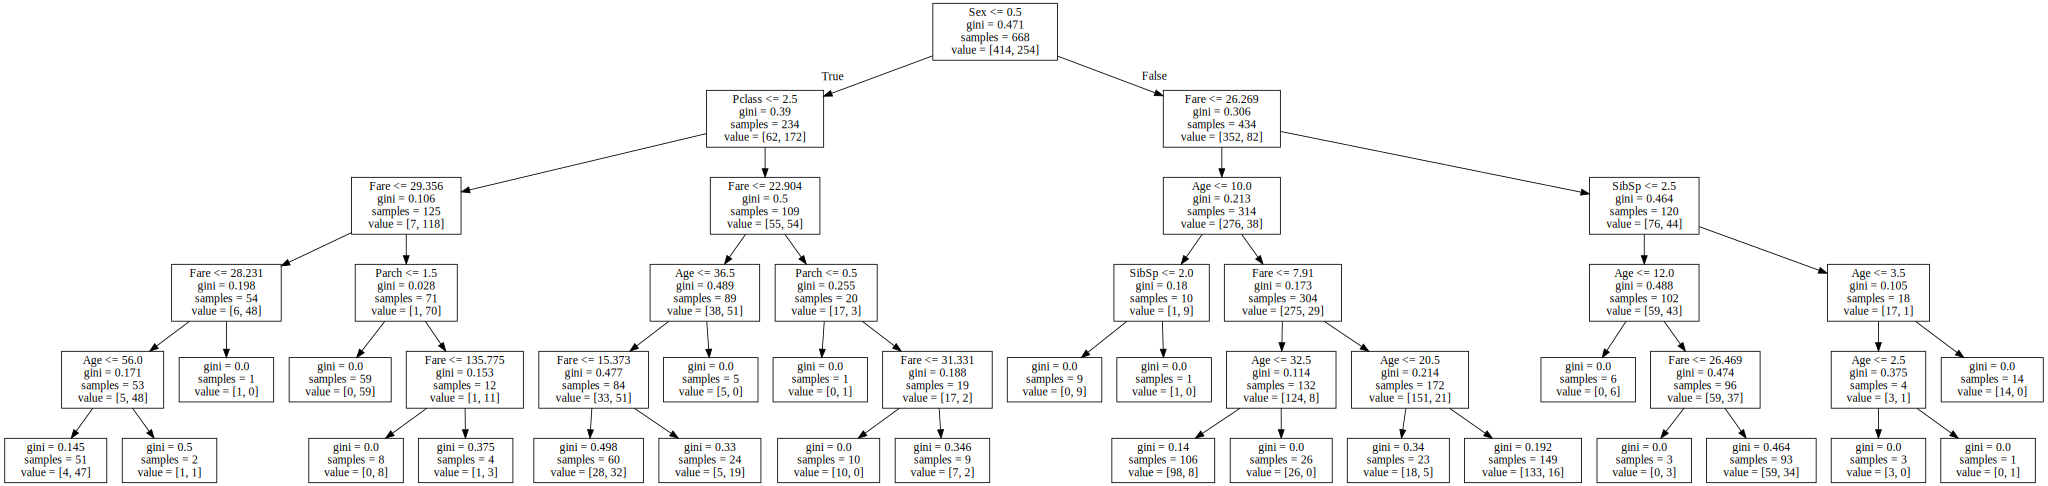

In [48]:
SVG(graph.pipe(format='svg'))